In [4]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 9.9 MB/s  0:00:00
INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 MB 104.2 MB/s  0:00:01 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.3 MB/s  0:00:00m 2.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 71.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [torchaudio]37m━━━━ 8/9 [torchaudio]


In [5]:
! pip install xgboost==1.7.6

# Preprocessing & metrics
! pip install scikit-learn==1.3.0

# Data handling & visualization
! pip install pandas==2.1.1 numpy==1.24.3 matplotlib==3.8.0 seaborn==0.12.2

# Utilities
! pip install tqdm==4.66.1 joblib==1.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 101.7 MB/s  0:00:02 eta 0:00:010:01:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 74.7 MB/s  0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 86.4 MB/s  0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.3
    Uninstalling pandas-2.3.3:━━━━━━━━━━━━━━━━━━━━━━━━ 0/3 [pandas]
      Successfully uninstalled pandas-2.3.3━━━━━━━ 0/3 [pandas]
  Attempting uninstall: matplotlib━━━━━━━━━━━━━━━━━━━━ 0/3 [pandas]
    Found existing installation: matplotlib 3.9.4━ 0/3 [pandas]
 

In [2]:
# =================== Imports ===================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import KFold

In [3]:
# =================== GPU Setup ===================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_gpus = torch.cuda.device_count()
print(f"🖥️ Using {num_gpus} GPUs")

🖥️ Using 0 GPUs


In [4]:
# =================== Load & Split Data ===================
df = pd.read_csv("fulldata_rd7.csv")
print(df.info)
selected_features = [ 'u', 'g', 'r', 'i', 'z', 'petroRad_u',
    'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
    'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
    'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
    'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
    'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'u_g', 'g_r', 'r_i', 'i_z']

X = df[selected_features].values
y = df['redshift'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<bound method DataFrame.info of                  ra        dec         u         g         r         i  \
0        131.598399  49.892824  19.91396  19.88652  19.55724  19.48510   
1        131.614363  49.895224  21.72610  19.82969  18.97453  18.70725   
2        131.505227  49.973403  20.60903  18.26406  17.05696  16.70153   
3        131.648792  49.892616  21.15924  19.47403  18.52742  18.26878   
4        131.507923  50.000914  20.59268  20.20429  20.11275  20.12046   
...             ...        ...       ...       ...       ...       ...   
3697850  358.209126  31.084833  21.95207  21.40699  21.20043  21.05200   
3697851  358.209471  31.005526  22.50246  21.91592  21.85252  21.72241   
3697852  358.214519  30.953510  26.16734  21.76876  20.14158  19.14905   
3697853  358.260920  31.025976  25.62514  23.08200  21.21624  19.88421   
3697854  358.314917  30.920003  23.21627  21.22459  20.93306  20.91307   

                z  petroRad_u  petroRad_g  petroRad_i  ...   expAB_u  \
0      

In [1]:
! pip install faiss-gpu


k= 1
k=1, RMSE=0.56949
k= 2
k=2, RMSE=0.49691
k= 3
k=3, RMSE=0.47093
k= 4
k=4, RMSE=0.45817
k= 5
k=5, RMSE=0.45051
k= 6
k=6, RMSE=0.44556
k= 7
k=7, RMSE=0.44232
k= 8
k=8, RMSE=0.43981
k= 9
k=9, RMSE=0.43792
k= 10
k=10, RMSE=0.43667
k= 11
k=11, RMSE=0.43570
k= 12
k=12, RMSE=0.43492
k= 13
k=13, RMSE=0.43415
k= 14
k=14, RMSE=0.43383
k= 15
k=15, RMSE=0.43347
k= 16
k=16, RMSE=0.43330
k= 17
k=17, RMSE=0.43306
k= 18
k=18, RMSE=0.43299
k= 19
k=19, RMSE=0.43294
k= 20
k=20, RMSE=0.43288
k= 21
k=21, RMSE=0.43285
k= 22
k=22, RMSE=0.43289
k= 23
k=23, RMSE=0.43293
k= 24
k=24, RMSE=0.43292
k= 25
k=25, RMSE=0.43293
k= 26
k=26, RMSE=0.43299
k= 27
k=27, RMSE=0.43312
k= 28
k=28, RMSE=0.43322
k= 29
k=29, RMSE=0.43332
k= 30
k=30, RMSE=0.43340


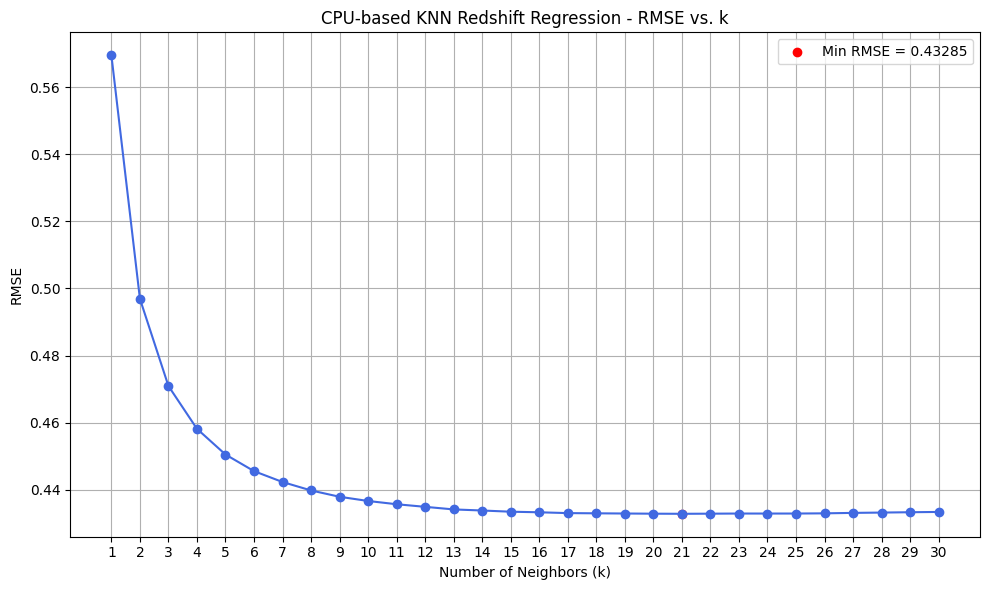

In [4]:
import numpy as np
import faiss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ========== Normalize and Split ==========
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# ========== Setup FAISS on CPU ==========
index = faiss.IndexFlatL2(X_train.shape[1])  # L2 distance (CPU index)

# ========== Add training vectors ==========
index.add(X_train)

# ========== Evaluate for different k ==========
k_values = list(range(1, 31))
rmse_values = []

max_k = max(k_values)
distances, indices = index.search(X_test, max_k)

rmse_values = []
for k in k_values:
    print("k=",k)
    preds = np.mean(y_train[indices[:, :k]], axis=1)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_values.append(rmse)
    print(f"k={k}, RMSE={rmse:.5f}")


# ========== Plot RMSE vs k ==========
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', color='royalblue')
plt.scatter(k_values[np.argmin(rmse_values)], min(rmse_values),
            color='red', label=f'Min RMSE = {min(rmse_values):.5f}')
plt.title("CPU-based KNN Redshift Regression - RMSE vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Random Forest with GPU

In [2]:
! pip install cupy-cuda11x cuml-cu11 --extra-index-url=https://pypi.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 9.9 MB/s  0:02:18s eta 0:00:010:00:04
  Using cached fastrlock-0.8.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_28_x86_64.whl.metadata (7.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 MB 9.0 MB/s  0:00:54 eta 0:00:010:00:02
  Using cached numba-0.60.0-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.7/838.7 MB 8.6 MB/s  0:01:35 eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 MB 9.0 MB/s  0:00:21 0:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 121.4 MB/s  0:00:00
  Using cached treelite-4.3.0-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 49.9 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.6 MB/s  0:00:00
  

In [ ]:
! pip uninstall -y cupy cuml
! pip install cupy-cuda12x cuml-cu12 --extra-index-url=https://pypi.nvidia.com




Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached cupy_cuda12x-13.6.0-cp39-cp39-manylinux2014_x86_64.whl.metadata (2.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 80.9 MB/s  0:00:18 eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 MB 7.7 MB/s  0:01:09 eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 MB 8.3 MB/s  0:01:33 eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 MB 10.1 MB/s  0:00:180m eta 0:00:010:01:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s  0:00:00
  Using cached cuda_python-12.9.4-py3-none-any.whl.metadata (4.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 7.7 MB/s  0:00:037.9 MB/s eta 0:00:01:01
  Using cached cuda_bindings-12.9.4-cp39-cp39-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (2.6 kB)
  Using cached cuda_pathfinder-1.3.1-py3-none-any.whl.metadata (1.9 kB)
     ━━━━━━━━━━━━━━━━━

In [5]:
import cupy as cp
import cuml

print("✅ CuPy version:", cp.__version__)
print("✅ cuML version:", cuml.__version__)

# Simple GPU test
x = cp.arange(10**6)
print("GPU sum works:", cp.sum(x))


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cupy/_environment.py:596: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''
<frozen importlib._bootstrap_external>:1182: FutureWarning: The cuda.cudart module is d

✅ CuPy version: 13.6.0
✅ cuML version: 24.08.00
GPU sum works: 499999500000


<bound method DataFrame.info of                  ra        dec         u         g         r         i  \
0        131.598399  49.892824  19.91396  19.88652  19.55724  19.48510   
1        131.614363  49.895224  21.72610  19.82969  18.97453  18.70725   
2        131.505227  49.973403  20.60903  18.26406  17.05696  16.70153   
3        131.648792  49.892616  21.15924  19.47403  18.52742  18.26878   
4        131.507923  50.000914  20.59268  20.20429  20.11275  20.12046   
...             ...        ...       ...       ...       ...       ...   
3697850  358.209126  31.084833  21.95207  21.40699  21.20043  21.05200   
3697851  358.209471  31.005526  22.50246  21.91592  21.85252  21.72241   
3697852  358.214519  30.953510  26.16734  21.76876  20.14158  19.14905   
3697853  358.260920  31.025976  25.62514  23.08200  21.21624  19.88421   
3697854  358.314917  30.920003  23.21627  21.22459  20.93306  20.91307   

                z  petroRad_u  petroRad_g  petroRad_i  ...   expAB_u  \
0      

/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=3 => RMSE: 0.48605, R²: 0.51012


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=4 => RMSE: 0.47416, R²: 0.53381


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=5 => RMSE: 0.46427, R²: 0.55305


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=6 => RMSE: 0.45508, R²: 0.57057


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=7 => RMSE: 0.44579, R²: 0.58792


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=8 => RMSE: 0.43718, R²: 0.60368


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=9 => RMSE: 0.42867, R²: 0.61898


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=10 => RMSE: 0.42059, R²: 0.63320


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=11 => RMSE: 0.41304, R²: 0.64624


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=12 => RMSE: 0.40620, R²: 0.65787


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=13 => RMSE: 0.40005, R²: 0.66815


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=14 => RMSE: 0.39463, R²: 0.67709


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=16 => RMSE: 0.38578, R²: 0.69140


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=18 => RMSE: 0.37950, R²: 0.70137


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=200, max_depth=20 => RMSE: 0.37527, R²: 0.70799


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=3 => RMSE: 0.48537, R²: 0.51151


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=4 => RMSE: 0.47366, R²: 0.53478


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=5 => RMSE: 0.46382, R²: 0.55391


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=6 => RMSE: 0.45442, R²: 0.57182


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=7 => RMSE: 0.44521, R²: 0.58900


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=8 => RMSE: 0.43654, R²: 0.60484


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=9 => RMSE: 0.42805, R²: 0.62006


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=10 => RMSE: 0.42012, R²: 0.63402


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=11 => RMSE: 0.41264, R²: 0.64694


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=12 => RMSE: 0.40584, R²: 0.65847


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=13 => RMSE: 0.39971, R²: 0.66871


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=14 => RMSE: 0.39431, R²: 0.67761


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=16 => RMSE: 0.38553, R²: 0.69181


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=18 => RMSE: 0.37926, R²: 0.70175


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=300, max_depth=20 => RMSE: 0.37503, R²: 0.70836


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=3 => RMSE: 0.48514, R²: 0.51196


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=4 => RMSE: 0.47342, R²: 0.53525


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=5 => RMSE: 0.46354, R²: 0.55446


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=6 => RMSE: 0.45412, R²: 0.57237


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=7 => RMSE: 0.44492, R²: 0.58953


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=8 => RMSE: 0.43625, R²: 0.60538


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=9 => RMSE: 0.42774, R²: 0.62062


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=10 => RMSE: 0.41980, R²: 0.63457


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=11 => RMSE: 0.41234, R²: 0.64744


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=12 => RMSE: 0.40555, R²: 0.65896


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=13 => RMSE: 0.39944, R²: 0.66916


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=14 => RMSE: 0.39405, R²: 0.67803


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=16 => RMSE: 0.38531, R²: 0.69216


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=18 => RMSE: 0.37907, R²: 0.70204


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=400, max_depth=20 => RMSE: 0.37486, R²: 0.70863


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=3 => RMSE: 0.48535, R²: 0.51155


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=4 => RMSE: 0.47372, R²: 0.53467


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=5 => RMSE: 0.46362, R²: 0.55431


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=6 => RMSE: 0.45407, R²: 0.57247


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=7 => RMSE: 0.44483, R²: 0.58969


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=8 => RMSE: 0.43612, R²: 0.60561


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=9 => RMSE: 0.42762, R²: 0.62083


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=10 => RMSE: 0.41966, R²: 0.63481


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=11 => RMSE: 0.41221, R²: 0.64766


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=12 => RMSE: 0.40541, R²: 0.65920


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=13 => RMSE: 0.39930, R²: 0.66939


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=14 => RMSE: 0.39392, R²: 0.67824


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=16 => RMSE: 0.38519, R²: 0.69234


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=18 => RMSE: 0.37897, R²: 0.70221


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=500, max_depth=20 => RMSE: 0.37476, R²: 0.70878


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=3 => RMSE: 0.48531, R²: 0.51163


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=4 => RMSE: 0.47370, R²: 0.53472


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=5 => RMSE: 0.46366, R²: 0.55423


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=6 => RMSE: 0.45413, R²: 0.57236


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=7 => RMSE: 0.44483, R²: 0.58970


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=8 => RMSE: 0.43603, R²: 0.60577


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=9 => RMSE: 0.42755, R²: 0.62095


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=10 => RMSE: 0.41961, R²: 0.63490


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=11 => RMSE: 0.41216, R²: 0.64775


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=12 => RMSE: 0.40536, R²: 0.65928


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=13 => RMSE: 0.39925, R²: 0.66947


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=14 => RMSE: 0.39387, R²: 0.67832


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=16 => RMSE: 0.38515, R²: 0.69241


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=18 => RMSE: 0.37894, R²: 0.70225


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=600, max_depth=20 => RMSE: 0.37472, R²: 0.70883


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=3 => RMSE: 0.48535, R²: 0.51154


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=4 => RMSE: 0.47378, R²: 0.53456


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=5 => RMSE: 0.46371, R²: 0.55413


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=6 => RMSE: 0.45412, R²: 0.57239


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=7 => RMSE: 0.44484, R²: 0.58968


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=8 => RMSE: 0.43604, R²: 0.60575


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=9 => RMSE: 0.42756, R²: 0.62094


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=10 => RMSE: 0.41961, R²: 0.63491


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=11 => RMSE: 0.41216, R²: 0.64775


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=12 => RMSE: 0.40537, R²: 0.65927


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=13 => RMSE: 0.39926, R²: 0.66945


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=14 => RMSE: 0.39388, R²: 0.67831


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=16 => RMSE: 0.38516, R²: 0.69240


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=18 => RMSE: 0.37893, R²: 0.70226


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=700, max_depth=20 => RMSE: 0.37472, R²: 0.70884


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=3 => RMSE: 0.48554, R²: 0.51116


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=4 => RMSE: 0.47390, R²: 0.53433


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=5 => RMSE: 0.46383, R²: 0.55390


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=6 => RMSE: 0.45426, R²: 0.57211


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=7 => RMSE: 0.44501, R²: 0.58936


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=8 => RMSE: 0.43622, R²: 0.60544


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=9 => RMSE: 0.42770, R²: 0.62069


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=10 => RMSE: 0.41973, R²: 0.63470


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=11 => RMSE: 0.41226, R²: 0.64758


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=12 => RMSE: 0.40544, R²: 0.65914


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=13 => RMSE: 0.39932, R²: 0.66936


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=14 => RMSE: 0.39392, R²: 0.67824


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=16 => RMSE: 0.38517, R²: 0.69237


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=18 => RMSE: 0.37893, R²: 0.70226


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=800, max_depth=20 => RMSE: 0.37471, R²: 0.70886


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=3 => RMSE: 0.48564, R²: 0.51096


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=4 => RMSE: 0.47396, R²: 0.53420


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=5 => RMSE: 0.46391, R²: 0.55374


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=6 => RMSE: 0.45434, R²: 0.57197


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=7 => RMSE: 0.44511, R²: 0.58918


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=8 => RMSE: 0.43631, R²: 0.60527


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=9 => RMSE: 0.42778, R²: 0.62054


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=10 => RMSE: 0.41981, R²: 0.63456


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=11 => RMSE: 0.41233, R²: 0.64746


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=12 => RMSE: 0.40551, R²: 0.65902


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=13 => RMSE: 0.39938, R²: 0.66925


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=14 => RMSE: 0.39398, R²: 0.67814


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=16 => RMSE: 0.38522, R²: 0.69230


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=18 => RMSE: 0.37896, R²: 0.70221


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for al

n_estimators=900, max_depth=20 => RMSE: 0.37473, R²: 0.70883


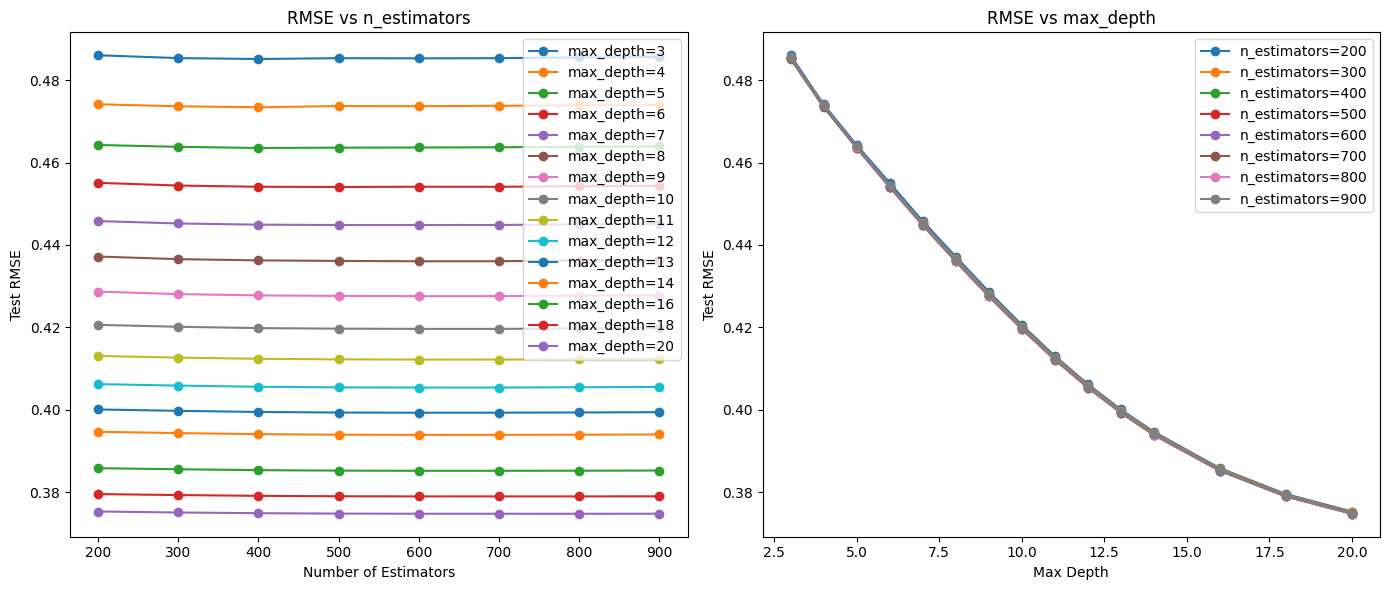


✅ Final Model Performance:
n_estimators=200, max_depth=3 - RMSE: 0.4861, R²: 0.5101
n_estimators=200, max_depth=4 - RMSE: 0.4742, R²: 0.5338
n_estimators=200, max_depth=5 - RMSE: 0.4643, R²: 0.5531
n_estimators=200, max_depth=6 - RMSE: 0.4551, R²: 0.5706
n_estimators=200, max_depth=7 - RMSE: 0.4458, R²: 0.5879
n_estimators=200, max_depth=8 - RMSE: 0.4372, R²: 0.6037
n_estimators=200, max_depth=9 - RMSE: 0.4287, R²: 0.6190
n_estimators=200, max_depth=10 - RMSE: 0.4206, R²: 0.6332
n_estimators=200, max_depth=11 - RMSE: 0.4130, R²: 0.6462
n_estimators=200, max_depth=12 - RMSE: 0.4062, R²: 0.6579
n_estimators=200, max_depth=13 - RMSE: 0.4000, R²: 0.6682
n_estimators=200, max_depth=14 - RMSE: 0.3946, R²: 0.6771
n_estimators=200, max_depth=16 - RMSE: 0.3858, R²: 0.6914
n_estimators=200, max_depth=18 - RMSE: 0.3795, R²: 0.7014
n_estimators=200, max_depth=20 - RMSE: 0.3753, R²: 0.7080
n_estimators=300, max_depth=3 - RMSE: 0.4854, R²: 0.5115
n_estimators=300, max_depth=4 - RMSE: 0.4737, R²: 0.

In [6]:
import pandas as pd
import numpy as np
import cupy as cp  # For GPU array operations
import cuml
from cuml.ensemble import RandomForestRegressor
from cuml.metrics import mean_squared_error as cuml_mse
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# ========= Load and preprocess the data =========
df = pd.read_csv("fulldata_rd7.csv")
print(df.info)
features = [ 'u', 'g', 'r', 'i', 'z', 'petroRad_u',
    'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
    'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
    'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
    'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
    'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'u_g', 'g_r', 'r_i', 'i_z']

X = df[features].values.astype(np.float32)
y = df["redshift"].values.astype(np.float32).reshape(-1, 1)

scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# Convert to GPU arrays
X_gpu = cp.asarray(X_scaled)
y_gpu = cp.asarray(y)

# ========= Hyperparameter grid =========
n_estimators_list = [200,300, 400, 500, 600, 700, 800, 900]
max_depth_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20]

best_rmse = float("inf")
best_params = None
results = []

# ========= Grid Search =========
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n_est in n_estimators_list:
    for max_d in max_depth_list:
        rmse_scores = []
        r2_scores = []

        for train_idx, val_idx in kf.split(X_gpu):
            X_train, X_val = X_gpu[train_idx], X_gpu[val_idx]
            y_train, y_val = y_gpu[train_idx], y_gpu[val_idx]

            rf_model = RandomForestRegressor(n_estimators=n_est, max_depth=max_d,
                                             random_state=42, n_streams=4, verbose=0)
            rf_model.fit(X_train, y_train.ravel())

            preds = rf_model.predict(X_val)
            rmse_val = cp.sqrt(cuml_mse(y_val, preds)).item()
            r2_val = r2_score(cp.asnumpy(y_val), cp.asnumpy(preds))

            rmse_scores.append(rmse_val)
            r2_scores.append(r2_val)

        mean_rmse = np.mean(rmse_scores)
        mean_r2 = np.mean(r2_scores)

        results.append({
            "n_estimators": n_est,
            "max_depth": max_d,
            "rmse": mean_rmse,
            "r2": mean_r2
        })

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_params = (n_est, max_d)

        print(f"n_estimators={n_est}, max_depth={max_d} => RMSE: {mean_rmse:.5f}, R²: {mean_r2:.5f}")

# ========= Convert results to DataFrame =========
ablation_df = pd.DataFrame(results)

# ========= Plot Results =========
plt.figure(figsize=(14, 6))

# Plot: RMSE vs n_estimators
plt.subplot(1, 2, 1)
for depth in sorted(ablation_df['max_depth'].unique()):
    subset = ablation_df[ablation_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['rmse'], marker='o', label=f'max_depth={depth}')
plt.title('RMSE vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test RMSE')
plt.legend()

# Plot: RMSE vs max_depth
plt.subplot(1, 2, 2)
for n_est in sorted(ablation_df['n_estimators'].unique()):
    subset = ablation_df[ablation_df['n_estimators'] == n_est]
    plt.plot(subset['max_depth'], subset['rmse'], marker='o', label=f'n_estimators={n_est}')
plt.title('RMSE vs max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Test RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# ========= Final Summary =========
print("\n✅ Final Model Performance:")
for row in results:
    print(f"n_estimators={row['n_estimators']}, max_depth={row['max_depth']} - RMSE: {row['rmse']:.4f}, R²: {row['r2']:.4f}")

print(f"\n🏆 Best Params: n_estimators={best_params[0]}, max_depth={best_params[1]} with RMSE={best_rmse:.5f}")


XGBoost simple run

In [5]:
# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb



# ==================== SCALING ====================
scaler = StandardScaler()

# Ensure data are NumPy arrays, not CuPy
X_train = np.array(X_train.get() if hasattr(X_train, "get") else X_train)
X_val = np.array(X_val.get() if hasattr(X_val, "get") else X_val)
X_test = np.array(X_test.get() if hasattr(X_test, "get") else X_test)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# ==================== ABLATION STUDY ====================
n_estimators_list = [100, 200, 300, 400, 500, 600, 700, 800, 900]
max_depth_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18]
ablation_results = []

for n_est in n_estimators_list:
    for depth in max_depth_list:
        print(f"\n🔍 Training XGBoost with n_estimators={n_est}, max_depth={depth}", end=" ")
        model = xgb.XGBRegressor(
            n_estimators=n_est,
            learning_rate=0.02,
            max_depth=depth,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=0.1,
            reg_lambda=0.1,
            random_state=42,
            n_jobs=-1
        )

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        y_pred = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        test_r2 = r2_score(y_test, y_pred)

        ablation_results.append({
            'n_estimators': n_est,
            'max_depth': depth,
            'rmse': test_rmse,
            'r2': test_r2
        })
        print('rmse =', test_rmse, "'r^2 =", test_r2)

ablation_df = pd.DataFrame(ablation_results)

# ==================== BOXPLOTS ====================
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=ablation_df, x='n_estimators', y='rmse')
plt.title('RMSE vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test RMSE')

plt.subplot(1, 2, 2)
sns.boxplot(data=ablation_df, x='max_depth', y='rmse')
plt.title('RMSE vs max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Test RMSE')

plt.tight_layout()
plt.show()

# ==================== SCATTER PLOTS ====================
plt.figure(figsize=(14, 6))

# Plot: RMSE vs n_estimators
plt.subplot(1, 2, 1)
for depth in sorted(ablation_df['max_depth'].unique()):
    subset = ablation_df[ablation_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['rmse'], marker='o', label=f'max_depth={depth}')
plt.title('RMSE vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Test RMSE')
plt.legend()

# Plot: RMSE vs max_depth
plt.subplot(1, 2, 2)
for n_est in sorted(ablation_df['n_estimators'].unique()):
    subset = ablation_df[ablation_df['n_estimators'] == n_est]
    plt.plot(subset['max_depth'], subset['rmse'], marker='o', label=f'n_estimators={n_est}')
plt.title('RMSE vs max_depth')
plt.xlabel('Max Depth')
plt.ylabel('Test RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# ==================== RESULTS ====================
print("\n✅ Final Model Performance:")
for i, row in ablation_df.iterrows():
    print(f"n_estimators={row['n_estimators']}, max_depth={row['max_depth']} - RMSE: {row['rmse']:.4f}, R²: {row['r2']:.4f}")

best_model = ablation_df.loc[ablation_df['rmse'].idxmin()]
print(f"\n🏆 Best configuration: n_estimators={best_model['n_estimators']}, "
      f"max_depth={best_model['max_depth']} with RMSE={best_model['rmse']:.4f}, R²={best_model['r2']:.4f}")



🔍 Training XGBoost with n_estimators=100, max_depth=3 rmse = 0.4670484026317216 'r^2 = 0.5472393508846554

🔍 Training XGBoost with n_estimators=100, max_depth=4 rmse = 0.44797614732702185 'r^2 = 0.5834619566900845

🔍 Training XGBoost with n_estimators=100, max_depth=5 rmse = 0.4331866675955803 'r^2 = 0.6105111270966466

🔍 Training XGBoost with n_estimators=100, max_depth=6 rmse = 0.4218388251248886 'r^2 = 0.630650097032214

🔍 Training XGBoost with n_estimators=100, max_depth=7 rmse = 0.4123416575613977 'r^2 = 0.6470937770353535

🔍 Training XGBoost with n_estimators=100, max_depth=8 rmse = 0.40364774331382786 'r^2 = 0.6618184196109427

🔍 Training XGBoost with n_estimators=100, max_depth=9 rmse = 0.39681502627748955 'r^2 = 0.6731706047320951

🔍 Training XGBoost with n_estimators=100, max_depth=10 rmse = 0.3913416548584017 'r^2 = 0.6821245074834367

🔍 Training XGBoost with n_estimators=100, max_depth=11 rmse = 0.3870383240563353 'r^2 = 0.6890770120139902

🔍 Training XGBoost with n_estima

KeyboardInterrupt: 

In [6]:
import pandas as pd

# Convert to DataFrame
df_results = pd.DataFrame(ablation_results)

# Save as CSV (or JSON if you prefer)
df_results.to_csv("ablation_results.csv", index=False)
print("✅ Ablation results saved to ablation_results.csv")


✅ Ablation results saved to ablation_results.csv


NN+XGBoost

⚡ Using DataParallel across multiple GPUs


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:179.)
  return F.linear(input, self.weight, self.bias)


Epoch 1/100, Train Loss: 0.20157, Val Loss: 0.16662
Epoch 2/100, Train Loss: 0.17169, Val Loss: 0.15836
Epoch 3/100, Train Loss: 0.16298, Val Loss: 0.15015
Epoch 4/100, Train Loss: 0.15903, Val Loss: 0.14597
Epoch 5/100, Train Loss: 0.15620, Val Loss: 0.14661
Epoch 6/100, Train Loss: 0.15439, Val Loss: 0.14237
Epoch 7/100, Train Loss: 0.15263, Val Loss: 0.14448
Epoch 8/100, Train Loss: 0.15150, Val Loss: 0.14407
Epoch 9/100, Train Loss: 0.15033, Val Loss: 0.14311
Epoch 10/100, Train Loss: 0.14916, Val Loss: 0.13900
Epoch 11/100, Train Loss: 0.14824, Val Loss: 0.13836
Epoch 12/100, Train Loss: 0.14753, Val Loss: 0.14003
Epoch 13/100, Train Loss: 0.14672, Val Loss: 0.14297
Epoch 14/100, Train Loss: 0.14638, Val Loss: 0.13719
Epoch 15/100, Train Loss: 0.14598, Val Loss: 0.13854
Epoch 16/100, Train Loss: 0.14541, Val Loss: 0.13756
Epoch 17/100, Train Loss: 0.14497, Val Loss: 0.14047
Epoch 18/100, Train Loss: 0.14460, Val Loss: 0.13761
Epoch 19/100, Train Loss: 0.14428, Val Loss: 0.13609
Ep

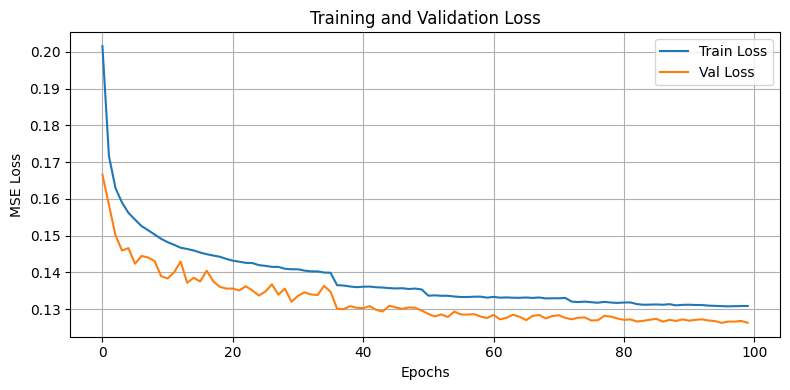


Train RMSE: 0.3554, R²: 0.7382
Val   RMSE: 0.3554, R²: 0.7382
Test  RMSE: 0.3580, R²: 0.7342


In [5]:
# =================== Neural Network Definition ===================
class RedshiftEmbeddingModel(nn.Module):
    def __init__(self, input_dim=9, embedding_size=32):
        super(RedshiftEmbeddingModel, self).__init__()
        self.dense1 = nn.Linear(input_dim, 128)
        self.norm1 = nn.LayerNorm(128)
        self.dense2 = nn.Linear(128, 64)
        self.norm2 = nn.LayerNorm(64)
        self.embedding = nn.Linear(64, embedding_size)
        self.output = nn.Linear(embedding_size, 1)

    def forward(self, x):
        x = F.relu(self.norm1(self.dense1(x)))
        x = F.dropout(x, p=0.2, training=self.training)
        x = F.relu(self.norm2(self.dense2(x)))
        x = F.dropout(x, p=0.2, training=self.training)
        embedding = F.relu(self.embedding(x))
        output = self.output(embedding)
        return output, embedding

# =================== Training Function ===================
def train_model(model, train_loader, val_loader, epochs=100, lr=0.001):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)
    criterion = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            pred, _ = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                pred, _ = model(xb)
                loss = criterion(pred, yb)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        scheduler.step(val_loss)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}")

    return train_losses, val_losses

# =================== Evaluation Function ===================
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        preds, _ = model(torch.tensor(X, dtype=torch.float32).to(device))
    preds = preds.cpu().numpy().flatten()
    rmse = np.sqrt(mean_squared_error(y, preds))
    r2 = r2_score(y, preds)
    return rmse, r2, preds

# =================== Data Preparation ===================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

torch_train = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
)
torch_val = TensorDataset(
    torch.tensor(X_val_scaled, dtype=torch.float32),
    torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)
)

train_loader = DataLoader(torch_train, batch_size=512, shuffle=True, pin_memory=True)
val_loader = DataLoader(torch_val, batch_size=512, pin_memory=True)

# =================== Model Setup (GPU + Parallel) ===================
model = RedshiftEmbeddingModel(input_dim=X_train.shape[1], embedding_size=32)

if num_gpus > 1:
    print("⚡ Using DataParallel across multiple GPUs")
    model = nn.DataParallel(model)

model = model.to(device)

# =================== Train the Model ===================
train_losses, val_losses = train_model(model, train_loader, val_loader)

# =================== Plot Loss Curves ===================
plt.figure(figsize=(8, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =================== Evaluation ===================
train_rmse, train_r2, _ = evaluate_model(model, X_train_scaled, y_train)
val_rmse, val_r2, _ = evaluate_model(model, X_val_scaled, y_val)
test_rmse, test_r2, test_preds = evaluate_model(model, X_test_scaled, y_test)

print(f"\nTrain RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Val   RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

# =================== Extract Embeddings ===================
model.eval()
with torch.no_grad():
    _, train_embed = model(torch.tensor(X_train_scaled, dtype=torch.float32).to(device))
    _, val_embed = model(torch.tensor(X_val_scaled, dtype=torch.float32).to(device))
    _, test_embed = model(torch.tensor(X_test_scaled, dtype=torch.float32).to(device))

train_embed = train_embed.cpu().numpy()
val_embed = val_embed.cpu().numpy()
test_embed = test_embed.cpu().numpy()

# =================== Combine Features + Embeddings ===================
X_train_hybrid = np.hstack((X_train_scaled, train_embed))
X_val_hybrid = np.hstack((X_val_scaled, val_embed))
X_test_hybrid = np.hstack((X_test_scaled, test_embed))

/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:24:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:24:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)



✅ Final Model Performance with XGBoost:
TRAIN - RMSE: 0.3185, R²: 0.7896
VAL - RMSE: 0.3500, R²: 0.7461
TEST - RMSE: 0.3527, R²: 0.7420


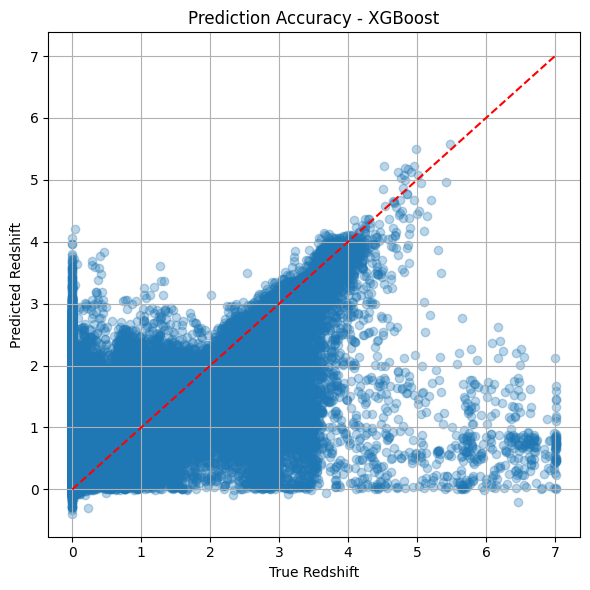

In [6]:


# =================== XGBoost (GPU Mode) ===================
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist',   # ✅ Enables GPU acceleration
    gpu_id=0                  # Use GPU 0
)
xgb_model.fit(X_train_hybrid, y_train)

# =================== Evaluation ===================
def xgb_metrics(model, X, y):
    preds = model.predict(X)
    return {
        'rmse': np.sqrt(mean_squared_error(y, preds)),
        'r2': r2_score(y, preds)
    }

xgb_results = {
    'train': xgb_metrics(xgb_model, X_train_hybrid, y_train),
    'val': xgb_metrics(xgb_model, X_val_hybrid, y_val),
    'test': xgb_metrics(xgb_model, X_test_hybrid, y_test)
}

print("\n✅ Final Model Performance with XGBoost:")
for split, scores in xgb_results.items():
    print(f"{split.upper()} - RMSE: {scores['rmse']:.4f}, R²: {scores['r2']:.4f}")

# =================== Scatter Plot ===================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_model.predict(X_test_hybrid), alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Prediction Accuracy - XGBoost')
plt.grid(True)
plt.tight_layout()
plt.show()

XGBoost

In [9]:
! pip install nvidia-ml-py3


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'nvidia-ml-py3' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'nvidia-ml-py3'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19208 sha256=da0529664cb299725a4cd3dcd62224972f1a5fa1616a0f9dbc3e45e1367560b7
  Stored in directory: /cluster/home/omals/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3


In [4]:
# =================== Imports ===================
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch

# =================== Data Preparation ===================
# Assuming X and y are already defined (e.g., from a DataFrame)
# Example:
# X = df.drop(columns=['redshift'])
# y = df['redshift']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize Features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =================== GPU Detection ===================
n_gpus = torch.cuda.device_count()
print(f"🖥️ Detected {n_gpus} GPU(s).")

gpu_id = 0 if n_gpus > 0 else -1

# =================== Define XGBoost Model ===================
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=8,
    objective='reg:squarederror',
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    tree_method='gpu_hist' if gpu_id >= 0 else 'hist',
    gpu_id=gpu_id if gpu_id >= 0 else None
)

print(f"✅ Using GPU ID: {gpu_id}" if gpu_id >= 0 else "⚙️ Using CPU mode")

# =================== Train Model ===================
xgb_model.fit(X_train_scaled, y_train)

# =================== Predictions ===================
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# =================== Evaluation ===================
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# =================== Results ===================
print("\n📊 XGBoost Regression Results:")
print(f"Train RMSE: {rmse_train:.5f}")
print(f"Test RMSE:  {rmse_test:.5f}")
print(f"Train R²:   {r2_train:.5f}")
print(f"Test R²:    {r2_test:.5f}")


🖥️ Detected 2 GPU(s).
✅ Using GPU ID: 0


/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:25:12] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:25:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/xgboost/core.py:158: UserWarning: [12:25:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



📊 XGBoost Regression Results:
Train RMSE: 0.33682
Test RMSE:  0.36297
Train R²:   0.76478
Test R²:    0.72670


FCN+XGboost

Epoch 1/100, Train Loss: 0.89280, Val Loss: 0.18453
Epoch 2/100, Train Loss: 0.23558, Val Loss: 0.16621
Epoch 3/100, Train Loss: 0.20504, Val Loss: 0.16087
Epoch 4/100, Train Loss: 0.26570, Val Loss: 0.17029
Epoch 5/100, Train Loss: 0.20478, Val Loss: 0.40575
Epoch 6/100, Train Loss: 0.18638, Val Loss: 0.22838
Epoch 7/100, Train Loss: 0.21003, Val Loss: 0.35431
Epoch 8/100, Train Loss: 0.56185, Val Loss: 0.16759
Epoch 9/100, Train Loss: 0.18408, Val Loss: 0.57761
Epoch 10/100, Train Loss: 0.31496, Val Loss: 0.35111
Epoch 11/100, Train Loss: 0.22523, Val Loss: 0.34027
Epoch 12/100, Train Loss: 0.40839, Val Loss: 0.37422
Epoch 13/100, Train Loss: 0.22802, Val Loss: 0.24625
Epoch 14/100, Train Loss: 0.20608, Val Loss: 0.19270
Epoch 15/100, Train Loss: 0.38345, Val Loss: 0.23525
Epoch 16/100, Train Loss: 0.19885, Val Loss: 0.49228
Epoch 17/100, Train Loss: 0.33776, Val Loss: 0.86760
Epoch 18/100, Train Loss: 0.31522, Val Loss: 0.17882
Epoch 19/100, Train Loss: 0.43007, Val Loss: 0.19188
Ep

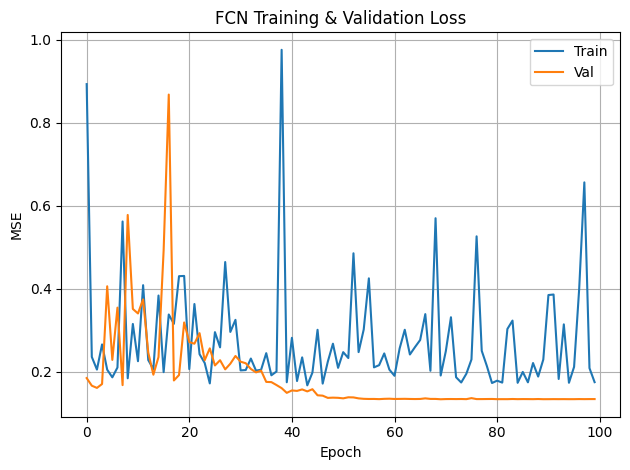


Train RMSE: 0.3740, R²: 0.7101
Val   RMSE: 0.3660, R²: 0.7222
Test  RMSE: 0.3717, R²: 0.7134

✅ Final Model Performance with FCN + XGBoost:
TRAIN - RMSE: 0.3253, R²: 0.7806
VAL - RMSE: 0.3539, R²: 0.7403
TEST - RMSE: 0.3566, R²: 0.7361


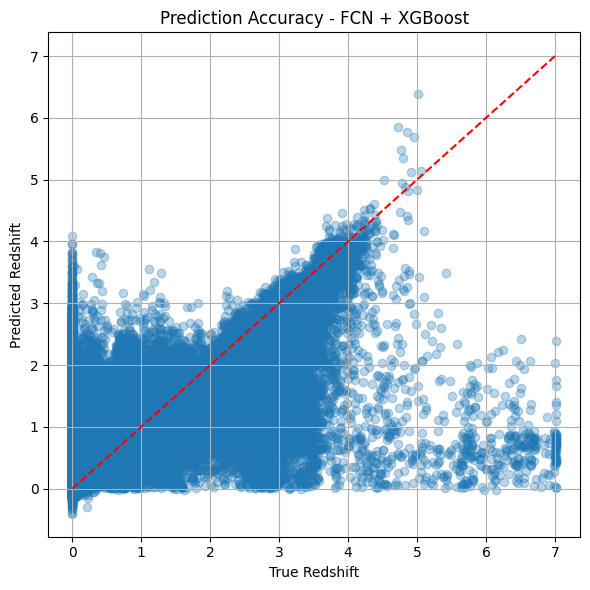

In [8]:
# =================== FCN Definition ===================
class RedshiftFCN(nn.Module):
    def __init__(self, input_dim=36):
        super(RedshiftFCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 100)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 65)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(65, 35)
        self.dropout3 = nn.Dropout(0.2)
        self.out = nn.Linear(35, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu(self.fc3(x))
        x = self.dropout3(x)
        return self.out(x), x  # Return final hidden features before output

# =================== Training Function ===================
def train_model(model, train_loader, val_loader, epochs=100, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5)
    criterion = nn.MSELoss()
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_loader:
            optimizer.zero_grad()
            pred, _ = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                pred, _ = model(xb)
                loss = criterion(pred, yb)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        scheduler.step(val_loss)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}")

    return train_losses, val_losses

# =================== Evaluation ===================
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        preds, _ = model(torch.tensor(X, dtype=torch.float32))
    preds = preds.numpy().flatten()
    rmse = np.sqrt(mean_squared_error(y, preds))
    r2 = r2_score(y, preds)
    return rmse, r2, preds

# =================== Preprocessing ===================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

torch_train = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32))
torch_val = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32), torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32))

train_loader = DataLoader(torch_train, batch_size=64, shuffle=True)
val_loader = DataLoader(torch_val, batch_size=64)

# =================== Train FCN ===================
model = RedshiftFCN(input_dim=X_train.shape[1])
train_losses, val_losses = train_model(model, train_loader, val_loader)

# =================== Loss Plot ===================
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Val')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('FCN Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# =================== Evaluation ===================
train_rmse, train_r2, _ = evaluate_model(model, X_train_scaled, y_train)
val_rmse, val_r2, _ = evaluate_model(model, X_val_scaled, y_val)
test_rmse, test_r2, test_preds = evaluate_model(model, X_test_scaled, y_test)

print(f"\nTrain RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Val   RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")
print(f"Test  RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

# =================== Extract Features ===================
model.eval()
with torch.no_grad():
    _, train_embed = model(torch.tensor(X_train_scaled, dtype=torch.float32))
    _, val_embed = model(torch.tensor(X_val_scaled, dtype=torch.float32))
    _, test_embed = model(torch.tensor(X_test_scaled, dtype=torch.float32))

train_embed = train_embed.numpy()
val_embed = val_embed.numpy()
test_embed = test_embed.numpy()

X_train_hybrid = np.hstack((X_train_scaled, train_embed))
X_val_hybrid = np.hstack((X_val_scaled, val_embed))
X_test_hybrid = np.hstack((X_test_scaled, test_embed))

# =================== XGBoost ===================
xgb_model = xgb.XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_hybrid, y_train)

def xgb_metrics(model, X, y):
    preds = model.predict(X)
    return {'rmse': np.sqrt(mean_squared_error(y, preds)), 'r2': r2_score(y, preds)}

xgb_results = {
    'train': xgb_metrics(xgb_model, X_train_hybrid, y_train),
    'val': xgb_metrics(xgb_model, X_val_hybrid, y_val),
    'test': xgb_metrics(xgb_model, X_test_hybrid, y_test)
}

print("\n✅ Final Model Performance with FCN + XGBoost:")
for split, scores in xgb_results.items():
    print(f"{split.upper()} - RMSE: {scores['rmse']:.4f}, R²: {scores['r2']:.4f}")

# =================== Scatter Plot ===================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, xgb_model.predict(X_test_hybrid), alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Prediction Accuracy - FCN + XGBoost')
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ========= Prepare data =========
# Assuming you already have X (features) and y (target)
# Example: X = df.drop(columns=['redshift']); y = df['redshift']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========= Normalize features =========
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========= Train Random Forest =========
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=14,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

# ========= Predict & Evaluate =========
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("📊 Random Forest Results:")
print(f"Train RMSE: {rmse_train:.5f}")
print(f"Test RMSE:  {rmse_test:.5f}")
print(f"Train R²:   {r2_train:.5f}")
print(f"Test R²:    {r2_test:.5f}")


📊 Random Forest Results:
Train RMSE: 0.35095
Test RMSE:  0.37714
Train R²:   0.74463
Test R²:    0.70494


In [16]:
! pip install tensorflow[and-cuda]
! pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 46.5 MB/s  0:00:00 46.1 MB/s eta 0:00:01


SVM

In [12]:
from sklearn.svm import SVR, LinearSVR
import time

# =================== Normalize Features ===================
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

print("\n🔹 Features normalized.")


# =================== Train-Test Split ===================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"🔹 Training samples: {X_train.shape[0]}")
print(f"🔹 Testing samples:  {X_test.shape[0]}")


# =================== Model Choice ===================
# For large datasets: LinearSVR (much faster)
# For smaller datasets: SVR(kernel='rbf')
use_fast_model = True  # set to False for RBF SVR

if use_fast_model:
    print("\n⚙️ Using LinearSVR for large dataset (fast training)...")
    model = LinearSVR(
        C=1.0,
        epsilon=0.1,
        random_state=42,
        verbose=1,  # show training progress
        max_iter=10000
    )
else:
    print("\n⚙️ Using SVR (RBF kernel) — may take long for large datasets...")
    model = SVR(
        kernel="rbf",
        C=1.0,
        epsilon=0.1,
        verbose=True  # prints limited solver info
    )


# =================== Train Model with Timing ===================
print("\n🚀 Training started...")
start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
print(f"✅ Training completed in {end_time - start_time:.2f} seconds.")


# =================== Predictions ===================
print("\n🔹 Making predictions...")
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# =================== Evaluation ===================
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# =================== Results ===================
print("\n📊 Support Vector Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")



🔹 Features normalized.
🔹 Training samples: 2958284
🔹 Testing samples:  739571

⚙️ Using LinearSVR for large dataset (fast training)...

🚀 Training started...
[LibLinear]..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/cluster/home/omals/DataToDrive/SDSSData/.venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



📊 Support Vector Regression Results:
Train RMSE: 0.55056
Test RMSE:  0.54441
Train R²:   0.37153
Test R²:    0.38517


Bayessian Linear Regressor

In [11]:
# =================== Imports ===================
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# =================== Normalize Features ===================
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# =================== Split Data ===================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =================== Define and Train Model ===================
model = BayesianRidge()
model.fit(X_train, y_train)

# =================== Predictions ===================
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# =================== Evaluation ===================
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# =================== Print Results ===================
print("📊 Bayesian Ridge Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")


📊 Bayesian Ridge Regression Results:
Train RMSE: 0.52049
Test RMSE:  0.52050
Train R²:   0.43833
Test R²:    0.43798


ElasticNetRegressor

In [10]:
# =================== Imports ===================
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# =================== Normalize Features ===================
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# =================== Split Data ===================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =================== Define Model ===================
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)

# =================== Train Model ===================
elastic_model.fit(X_train, y_train)

# =================== Predictions ===================
y_train_pred = elastic_model.predict(X_train)
y_test_pred = elastic_model.predict(X_test)

# =================== Evaluation ===================
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# =================== Results ===================
print("📊 ElasticNet Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")


📊 ElasticNet Regression Results:
Train RMSE: 0.65895
Test RMSE:  0.65918
Train R²:   0.09974
Test R²:    0.09860


Lasso Regression

In [9]:
# =================== Imports ===================
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# =================== Normalize Features ===================
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# =================== Split Data ===================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =================== Define Model ===================
lasso_model = Lasso(alpha=0.01, random_state=42)

# =================== Train Model ===================
lasso_model.fit(X_train, y_train)

# =================== Predictions ===================
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# =================== Evaluation ===================
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# =================== Results ===================
print("📊 Lasso Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")


📊 Lasso Regression Results:
Train RMSE: 0.66265
Test RMSE:  0.66280
Train R²:   0.08960
Test R²:    0.08867


RidgeRegressor

In [8]:
# =================== Imports ===================
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# =================== Normalize Features ===================
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# =================== Split Data ===================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =================== Define and Train Model ===================
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# =================== Predictions ===================
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# =================== Evaluation ===================
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# =================== Results ===================
print("📊 Ridge Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")


📊 Ridge Regression Results:
Train RMSE: 0.52049
Test RMSE:  0.52051
Train R²:   0.43832
Test R²:    0.43797


DEcision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np

# ========= Normalize features =========
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# ========= Define RMSE function =========
def rmse_torch(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2)).item()

# ========= Single train-test split =========
print("\n🌳 Running Decision Tree Regression on a single train-test split...")

X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

# Train Decision Tree
dt_model = DecisionTreeRegressor(max_depth=12, random_state=42)
dt_model.fit(X_train.numpy(), y_train.numpy().ravel())

# Predict and evaluate
preds = dt_model.predict(X_test.numpy())
preds_tensor = torch.tensor(preds, dtype=torch.float32).reshape(-1, 1)
rmse_val = rmse_torch(y_test, preds_tensor)

print(f"📊 Decision Tree RMSE on test set: {rmse_val:.5f}")



🌳 Running Decision Tree Regression on a single train-test split...
📊 Decision Tree RMSE on test set: 0.40217


KNN

In [6]:
# ========= Imports =========
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ========= Normalize features =========
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# ========= Split data =========
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ========= Train KNN model =========
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train.ravel())

# ========= Predictions =========
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# ========= Evaluation =========
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# ========= Results =========
print("\n📊 KNN Regression Results:")
print(f"Train RMSE: {train_rmse:.5f}")
print(f"Test RMSE:  {test_rmse:.5f}")
print(f"Train R²:   {train_r2:.5f}")
print(f"Test R²:    {test_r2:.5f}")



📊 KNN Regression Results:
Train RMSE: 0.39531
Test RMSE:  0.48654
Train R²:   0.67601
Test R²:    0.50894


NN+Random Forest


✅ Final Model Performance:
TRAIN - RMSE: 0.3222, R²: 0.7848
VAL - RMSE: 0.3522, R²: 0.7428
TEST - RMSE: 0.3548, R²: 0.7388


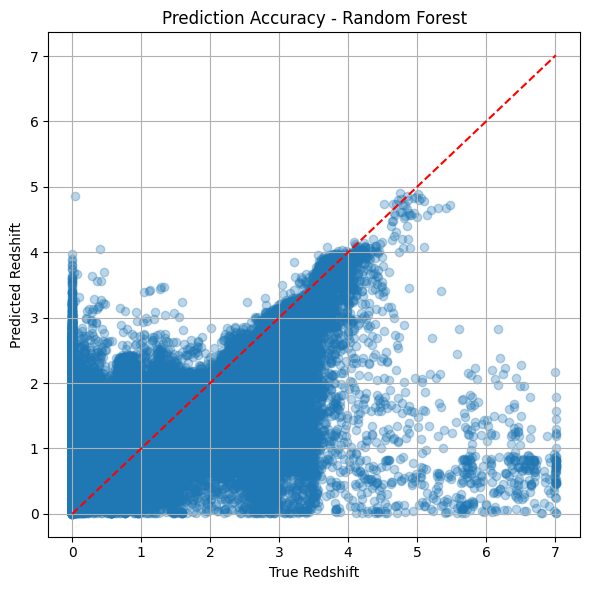

In [7]:
from sklearn.ensemble import RandomForestRegressor
# =================== Random Forest ===================
rf = RandomForestRegressor(n_estimators=400, max_depth=14, random_state=42, n_jobs=-1)
rf.fit(X_train_hybrid, y_train)

def rf_metrics(model, X, y):
    preds = model.predict(X)
    return {
        'rmse': np.sqrt(mean_squared_error(y, preds)),
        'r2': r2_score(y, preds)
    }

rf_results = {
    'train': rf_metrics(rf, X_train_hybrid, y_train),
    'val': rf_metrics(rf, X_val_hybrid, y_val),
    'test': rf_metrics(rf, X_test_hybrid, y_test)
}

# =================== Final Results ===================
print("\n✅ Final Model Performance:")
for split, scores in rf_results.items():
    print(f"{split.upper()} - RMSE: {scores['rmse']:.4f}, R²: {scores['r2']:.4f}")

# =================== Scatter Plot ===================
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf.predict(X_test_hybrid), alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Redshift')
plt.ylabel('Predicted Redshift')
plt.title('Prediction Accuracy - Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()


Linear Regressor

In [5]:
from sklearn.preprocessing import StandardScaler

# ========= Normalize features =========
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# ========= Define RMSE function =========
def rmse_torch(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2)).item()

# ========= Single run utility =========
def run_single_model(model, model_name, X_tensor, y_tensor, test_size=0.2, random_state=42):
    print(f"\n🔍 Running {model_name} on a single train-test split...")

    X_train, X_test, y_train, y_test = train_test_split(
        X_tensor, y_tensor, test_size=test_size, random_state=random_state
    )

    # Fit model
    model.fit(X_train.numpy(), y_train.numpy().ravel())

    # Predict
    preds = model.predict(X_test.numpy())
    preds_tensor = torch.tensor(preds, dtype=torch.float32).reshape(-1, 1)

    # Evaluate
    rmse_val = rmse_torch(y_test, preds_tensor)
    print(f"📊 {model_name} RMSE on test set: {rmse_val:.5f}")

# ========== Linear Regression Single Run ==========
run_single_model(LinearRegression(), "Linear Regression", X_tensor, y_tensor)



🔍 Running Linear Regression on a single train-test split...
📊 Linear Regression RMSE on test set: 0.68391


Gradient Boosting

In [4]:


# ========= Normalize features =========
scaler_X = StandardScaler().fit(X)
X_scaled = scaler_X.transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# ========= Define RMSE function =========
def rmse_torch(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2)).item()

# ========= Single train-test split =========
print("\n🔥 Running Gradient Boosting Regression on a single train-test split...")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Initialize model
gbr_model = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42
)

# Fit model
gbr_model.fit(X_train.numpy(), y_train.numpy().ravel())

# Predict
preds = gbr_model.predict(X_test.numpy())
preds_tensor = torch.tensor(preds, dtype=torch.float32).reshape(-1, 1)

# Evaluate
rmse_val = rmse_torch(y_test, preds_tensor)
print(f"📊 Gradient Boosting RMSE on test set: {rmse_val:.5f}")



🔥 Running Gradient Boosting Regression on a single train-test split...
📊 Gradient Boosting RMSE on test set: 0.40960


In [9]:

! pip install gpytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [gpytorch]━━ 3/4 [gpytorch]erator]


In [10]:
import torch
import gpytorch
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

device = "cuda" if torch.cuda.is_available() else "cpu"

# =================== Normalize features ===================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

# =================== Train/Validation/Test split ===================
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# =================== RMSE function ===================
def rmse(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2)).item()

# =================== Sparse GPR Model ===================
from gpytorch.variational import CholeskyVariationalDistribution, VariationalStrategy

class SparseGPRegressionModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = VariationalStrategy(self, inducing_points, variational_distribution, learn_inducing_locations=True)
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# =================== Training ===================
inducing_points = X_train[:500]  # Use first 500 points as inducing points
model = SparseGPRegressionModel(inducing_points).to(device)
likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)

model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=X_train.size(0))

num_epochs = 100
for i in range(num_epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = -mll(output, y_train)
    loss.backward()
    optimizer.step()
    if (i+1) % 10 == 0:
        print(f"Epoch {i+1}/{num_epochs}, Loss: {loss.item():.5f}")

# =================== Evaluation ===================
model.eval()
likelihood.eval()
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    val_preds = likelihood(model(X_val)).mean
    test_preds = likelihood(model(X_test)).mean

# Metrics
val_rmse = rmse(y_val, val_preds)
val_r2 = r2_score(y_val.cpu().numpy(), val_preds.cpu().numpy())

test_rmse = rmse(y_test, test_preds)
test_r2 = r2_score(y_test.cpu().numpy(), test_preds.cpu().numpy())

print("\n📊 Validation Results:")
print(f"RMSE: {val_rmse:.5f}, R²: {val_r2:.5f}")

print("\n📊 Test Results:")
print(f"RMSE: {test_rmse:.5f}, R²: {test_r2:.5f}")


Epoch 10/100, Loss: 1.26101
Epoch 20/100, Loss: 1.05931
Epoch 30/100, Loss: 1.01197
Epoch 40/100, Loss: 0.98999
Epoch 50/100, Loss: 0.97746
Epoch 60/100, Loss: 0.96937
Epoch 70/100, Loss: 0.96366
Epoch 80/100, Loss: 0.95926
Epoch 90/100, Loss: 0.95567
Epoch 100/100, Loss: 0.95260

📊 Validation Results:
RMSE: 0.51405, R²: 0.45351

📊 Test Results:
RMSE: 0.51470, R²: 0.45046
